In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.feature_extraction.text
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import NMF
import os

In [2]:
os.chdir('/Users/chenzhikai/hdw_2017/printer_metadata/Relational database/')

In [3]:
#Prepocessing
path='printers.csv'

In [4]:
df=pd.read_csv(path,index_col=0,encoding = "ISO-8859-1")

In [5]:
df.dropna(inplace=True)

In [6]:
stop_words=['and', u'anderson',u'andrew','charles','christopher',
           'edward','francis','george','henry','james','john','joseph','london','paul',
           'pauls','richard','robert','samuel','smith','thomas','william','baldwin','benjamin',
            'his','simmons','the','wright','paules']

In [7]:
'''Topic modeling with Countervectorizer
finely tuned in such a way to remove stop words from the corpus
as most freq 1-6 grams as features'''
model=sklearn.feature_extraction.text.CountVectorizer(max_df=0.9,min_df=0.01,
                                                      stop_words=stop_words,
                                                     ngram_range=(1, 6))

In [8]:
matrix=model.fit_transform(df['publisher'].values.astype('U'))

In [9]:
#Get feature names
name=model.get_feature_names()

In [10]:
'''Use truncatedSVD on csr_matrix to get a good approxmation of
optimal num of topics'''
svd = TruncatedSVD(n_components=20)
svd.fit(matrix)

TruncatedSVD(algorithm='randomized', n_components=20, n_iter=5,
       random_state=None, tol=0.0)

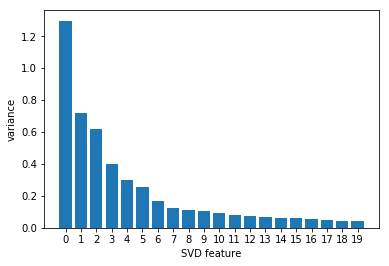

In [11]:
comp = range(svd.n_components)
plt.bar(comp,svd.explained_variance_)
plt.xticks(comp)
plt.ylabel('variance')
plt.xlabel('SVD feature')
plt.show()

In [12]:
'''Judging from the variances of the components, 
5 topics are befitting more data'''
nmf = NMF(n_components=5)

In [13]:
nmf.fit(matrix)

NMF(alpha=0.0, beta=1, eta=0.1, init=None, l1_ratio=0.0, max_iter=200,
  n_components=5, nls_max_iter=2000, random_state=None, shuffle=False,
  solver='cd', sparseness=None, tol=0.0001, verbose=0)

In [14]:
nmf_features = nmf.transform(matrix)

In [15]:
FeatTop=pd.DataFrame(nmf.components_,columns=name).T

In [16]:
topitem=[]
for col in FeatTop:
    topitem.append(FeatTop.loc[:,col].nlargest(10).index) 

In [17]:
my_dict={}
for i in range(1,6):
    my_dict.update({'Topic {0}'.format(i):topitem[i-1]})

In [20]:

TopMod=pd.DataFrame(my_dict)

In [24]:
'''5 topics respectively conresponds to the keywords for
seller, publisher,printer,location, and institutional affiliations'''
TopMod

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5
0,to be,for,by,at,to
1,be,printed,printed by,in,most
2,to,printed for,printed,of,by
3,are to be,in,for,signe,excellent
4,are to,tho,by for,signe of,most excellent
5,are,for tho,printed by for,at signe,printer
6,sold,at,sold by,at signe of,printer to
7,be sold,printed for tho,of,church,kings
8,to be sold,author,to,yard,to kings
9,are to be sold,for author,sold,church yard,kings most
